# Managing your content

As an organization matures and expands its GIS, users add items of various types and properties with varying relationships to one another. Any administrator must regularly manage items contained in various groups and owned by various users. In this section we demonstrate how to work with individual items in a GIS. This guide shows how to retrieve item properties, delete an existing item, and how to examine relationships between items.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Managing-your-content" data-toc-modified-id="Managing-your-content-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Managing your content</a></span><ul class="toc-item"><li><span><a href="#Properties-of-an-item" data-toc-modified-id="Properties-of-an-item-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Properties of an item</a></span><ul class="toc-item"><li><span><a href="#Updating-item-properties" data-toc-modified-id="Updating-item-properties-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Updating item properties</a></span></li></ul></li><li><span><a href="#Downloading-your-items" data-toc-modified-id="Downloading-your-items-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Downloading your items</a></span><ul class="toc-item"><li><span><a href="#Download-item-data" data-toc-modified-id="Download-item-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Download item data</a></span></li><li><span><a href="#Download-metadata" data-toc-modified-id="Download-metadata-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Download metadata</a></span></li><li><span><a href="#Download-thumbnail" data-toc-modified-id="Download-thumbnail-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Download thumbnail</a></span></li></ul></li><li><span><a href="#Deleting-content" data-toc-modified-id="Deleting-content-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Deleting content</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Delete-protection" data-toc-modified-id="Delete-protection-1.3.0.1"><span class="toc-item-num">1.3.0.1&nbsp;&nbsp;</span>Delete protection</a></span></li></ul></li></ul></li><li><span><a href="#Finding-relationships-between-items" data-toc-modified-id="Finding-relationships-between-items-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Finding relationships between items</a></span><ul class="toc-item"><li><span><a href="#Relationships-of-web-map-items" data-toc-modified-id="Relationships-of-web-map-items-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Relationships of web map items</a></span></li><li><span><a href="#Adding-relationships" data-toc-modified-id="Adding-relationships-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Adding relationships</a></span></li><li><span><a href="#Deleting-relationships" data-toc-modified-id="Deleting-relationships-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Deleting relationships</a></span></li></ul></li></ul></li></ul></div>

<a id="properties-of-an-item"></a>
## Properties of an item
An `Item` in your GIS is rich with multiple properties. You can access them as properties on the [`Item`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item) object;

In [1]:
#connect to GIS
from arcgis.gis import GIS
gis = GIS(profile="your_enterprise_profile")

In [2]:
#access an Item
volcanoes_item = gis.content.get('d7fd78fb56aa48a2a376e08e0c3caefb')

In [3]:
# title
volcanoes_item.title

'test_volcano'

In [4]:
# tags
volcanoes_item.tags

['python', 'vei', 'empirical', 'in-situ']

<a id="updating-item-properties"></a>
### Updating item properties
You can update any of the `Item`s properties using the [`update()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.update) method. It accepts parameters similar to [`add()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.add) method.

In [6]:
# update the tags
volcanoes_item.update(item_properties={'tags':'guide, update, empirical, in-situ'})

True

In [7]:
volcanoes_item.tags

['guide', 'update', 'empirical', 'in-situ']

In [8]:
# updating thumbnail
volcanoes_item.update(thumbnail=r'pathway\to\your\directory\IMAGE_NAME.jpg')

<a id="downloading-your-items"></a>
## Downloading your items
You can download various components of your items, such as the thumbnail, data, or metadata. Downloading assists you in the process of archiving content for a GIS your organization is retiring, or for publishing and migrating content from one GIS to another.

### Download item data
The [`get_data()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.get_data) function reads the binary or text data associated with an item and returns it as a byte array. 
 * If the text data is JSON, it converts the data to a Python dictionary. If it is another text format, it returns the file as a string.
 * If data is not text, binary files are returned along with the path to where the data is downloaded.

In [19]:
csv_item = gis.content.get('36ce5320085a4df0abc94b0075fc215b')

The data for a csv item is the csv file itself. It's downloaded to your default temporary directory

In [23]:
csv_item.get_data()

'\pathway\to\download\Local\Temp\test_volcano.csv'


### Download metadata
You can download metadata into an XML file using the `download_metadata()` method. Once you have the XML file you can edit it and then modify existing portal items by entering the file name as the metadata parameter of the [`Item.update()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.update) method. You can also add it with the metadata parameter on the [`ContentManager.add()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.add) method when creating new content.  See the specific documentation for enabling metadata with [ArcGIS Online](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.update) or [ArcGIS Enterprise](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.update).

In [9]:
csv_item.download_metadata(save_folder=r'\pathway\to\download\the\metadata\')

### Download thumbnail
Finally, you can download the thumbnail of an item using the `download_thumbnail()` method.

In [ ]:
csv_item.download_thumbnail(save_folder= r'pathway\to\your\directory\')

'pathway\to\your\directory\IMAGE_NAME.png'

## Deleting content
You can delete any item using the `delete()` method of the `Item` object. When deleting a hosted layer, this operation also deletes the hosted services powering the item.

In [10]:
item_for_deletion = gis.content.get('a1752743422b45f791b7eb4dbc5a8010')

In [11]:
item_for_deletion.delete()

#### Delete protection
You can protect items from getting deleted inadvertently. Use the `protect()` of the `Item` object for this. 

In [12]:
# let us protect the ports item we accessed earlier
csv_item.protect(enable = True)

{'success': True}

In [13]:
# attempting to delete will return an error
csv_item.delete()

Exception: Unable to delete item 36ce5320085a4df0abc94b0075fc215b. Delete protection is turned on.
(Error Code: 400)

As expected an exception is raised. You can disable delete protection by setting the `enable` parameter to `False`.

<a id ="finding-relationships-between-items"></a>
## Finding relationships between items
You can add many [types of items](http://enterprise.arcgis.com/en/portal/latest/use/supported-items.htm) to your web GIS. Depending upon the type of item, you can then perform different operations on that item. Once an item is added to the GIS, it  seldom exists in isolation but often relates to other items. You might [publish](http://enterprise.arcgis.com/en/portal/latest/use/publish-features.htm) new items from other items to create a new service, or create a new service as a result of a geoprocessing operation on a source item. You may also add one or more layer items to compose a web map or web scene item. Whenever you perform such operations, you establish a relationship between the items. A GIS supports different [relationship types](https://developers.arcgis.com/rest/users-groups-and-items/relationship-types.htm) depending upon the items involved. These relationships represent how items in your GIS are connected to one another. They also convey the impact removing an item from your GIS may have on other items. See the [Relationships between web services and portal items](https://enterprise.arcgis.com/en/server/latest/administer/linux/relationships-between-web-services-and-portal-items.htm) article for more information.

The `Item` class has 3 methods that allow you to determine the relationships to and from an item:
 * [`dependent_upon()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.dependent_upon)
 * [`dependent_to()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.dependent_to)
 * [`related_items()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.related_items)

Let us observe how the ports csv item and the feature layer published from this item share a relationship

> **NOTE:** The Relationship Type functionality is currently evolving within Enterprise and ArcGIS Online implementations. Some items do not currently return all relationships they have between other items.  

In [14]:
ports_feature_layer = gis.content.get('238d3e97434f40fda38bc846a97b5cfe')

Since we know this feature layer item is published from the csv, we can specify the `relationship_type` parameter as `Service2Data`. The direction of relationship would be `forward` as the current item is a service and we are looking for the original data used to publish it.

In [ ]:
ports_feature_layer.related_items('Service2Data', 'forward')

[<Item title:"US Locations of LNG and Oil Deep Water Ports" type:CSV owner:arcgis_python>]

On the ports csv item, the `relationship_type` remains the same whereas the direction is reversed

In [53]:
ports_csv_item.related_items('Service2Data', 'reverse')

[<Item title:"US Locations of LNG and Oil Deep Water Ports" type:Feature Layer Collection owner:arcgis_python>]

### Relationships of web map items
As seen above, source data and the services published from the data share a relationship. Web Map items share a `Map2Service` relationship with the items used as layers in the map. Let's examine what results we get with a web map using the methods described above.

<Item title:"Liberia Map" type:Web Map owner:arcgis_python>
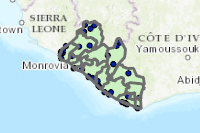

In [ ]:
webmap_item = gis.content.get('e92ec599e2a64c69945fe5cd833c8cb8')
webmap_item

The `dependent_upon()` method lists all forward relationships for an item. It also lists the items it depends on, and the type of dependency between the two items. In the case of this web map, it has three operational layers dependent upon hosted feature layers (with corresponsding item id values) and a base map layer that depends upon a map service (with corresponding url).

In [ ]:
webmap_item.dependent_upon()

{'list': [{'dependencyType': 'id', 'id': '77561ef541054730af5597ff4d1a3d98'},
  {'dependencyType': 'id', 'id': 'a1752743422b45f791b7eb4dbc5a8010'},
  {'dependencyType': 'id', 'id': '656e5b4e46ba474c8b146fd02803809a'},
  {'dependencyType': 'url',
   'url': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer'}],
 'nextStart': -1,
 'num': 4,
 'start': 1,
 'total': 4}

Calling `dependent_to()` lists the items which are dependent upon this web map item, which in this case is none.

In [ ]:
webmap_item.dependent_to()

{'list': [], 'nextStart': -1, 'num': 0, 'start': 1, 'total': 0}

The table in [this documentation](http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#/Relationship_types/02r3000000mm000000/) gives you the list of all supported relationship types that can exist between two items in your GIS.

### Adding relationships
It is beneficial to add a relationship to establish how information flows from one item to another across a GIS. In the web map example above, the map is dependent upon 4 other items. However, for the hosted feature layers (powered by feature services) the dependency type is listed as `id` instead of `Map2Service`. We can change that by adding a new relationship.

You can add a relationship by using the [`add_relationship()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.add_relationship) method to pass the item to which the current item is related and the type of relationship you want to create.

In [ ]:
#from the example above, use the item id of first relationship to get the related item
webmap_related_item = gis.content.get('77561ef541054730af5597ff4d1a3d98')
webmap_related_item

<Item title:"Access_To_Services" type:Feature Layer Collection owner:arcgis_python>

In [ ]:
# add a relationship
webmap_item.add_relationship(rel_item= webmap_related_item, rel_type= 'Map2Service')

True

Now that a relationship is added, the property is reflected on the web map item. After the update, querying for related items on the web map item promptly returns the feaure layer collection item.

In [ ]:
webmap_item.related_items('Map2Service', 'forward')

[<Item title:"Access_To_Services" type:Feature Layer Collection owner:arcgis_python>]

### Deleting relationships
You can remove defunct relationships by calling the `delete_relationship()` method and passing the relationship type and related item.